## Created by - Prasoon

## Car Price Prediction with Machine Learning


In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder    # for label encoding
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
df = pd.read_csv("/kaggle/input/carprice/CarPrice.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Getting data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
# Removing car_ID column
df.drop(columns=["car_ID"], inplace=True)

In [5]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [6]:
# Checking for null values
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

##### There are no missing values

In [7]:
# Checking for duplicate values
df.duplicated().sum()

0

##### There are no duplicate values

In [8]:
# Check for unique values in each column
unique_counts = df.nunique()
print(unique_counts)

symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64


In [9]:
# Checking CarName 
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

##### We can separate the comapnay name and car model.

In [10]:
# Split the 'CarName' column into two separate columns
df[['Brand', 'Model']] = df['CarName'].str.split(' ', n=1, expand=True)

# Drop the original 'CarName' column if needed
df = df.drop('CarName', axis=1)

In [11]:
# Checking for Unique values in Brand 
df.Brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

##### The are many typographical errors.

In [12]:
# Fixing the typographical errors
# Define a mapping dictionary to correct typographical errors
brand_mapping = {
    'maxda': 'mazda',
    'Nissan': 'nissan',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}

# Replace typographical errors in the 'Brand' column
df['Brand'] = df['Brand'].replace(brand_mapping)

In [13]:
df.dtypes

symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
Brand                object
Model                object
dtype: object

In [14]:
# Converting "symboling" to object datatype as it is a categorical column
df["symboling"] = df["symboling"].astype("object")

In [15]:
# Splitting columns into numerical and categorical
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include=['object'])

### Checking the correlation of different features with Price

In [16]:
# Compute the correlation matrix for numerical features
correlation_matrix = df_num.corr()

# Set a correlation coefficient threshold
threshold = 0.70    # For choosing features having correlation coefficient >= 0.70

# Filter features based on the threshold
selected_features = correlation_matrix[correlation_matrix['price'].abs() >= threshold].index

print(selected_features)

Index(['carwidth', 'curbweight', 'enginesize', 'horsepower', 'price'], dtype='object')


##### These features have correlation coefficient >=0.70  ->  'carwidth', 'curbweight', 'enginesize', 'horsepower', 'price' 

In [17]:
# Creating a dataframe with correlation coefficient >=65
df_nfinal = df[['carwidth', 'curbweight', 'enginesize', 'horsepower',
                    'price']]

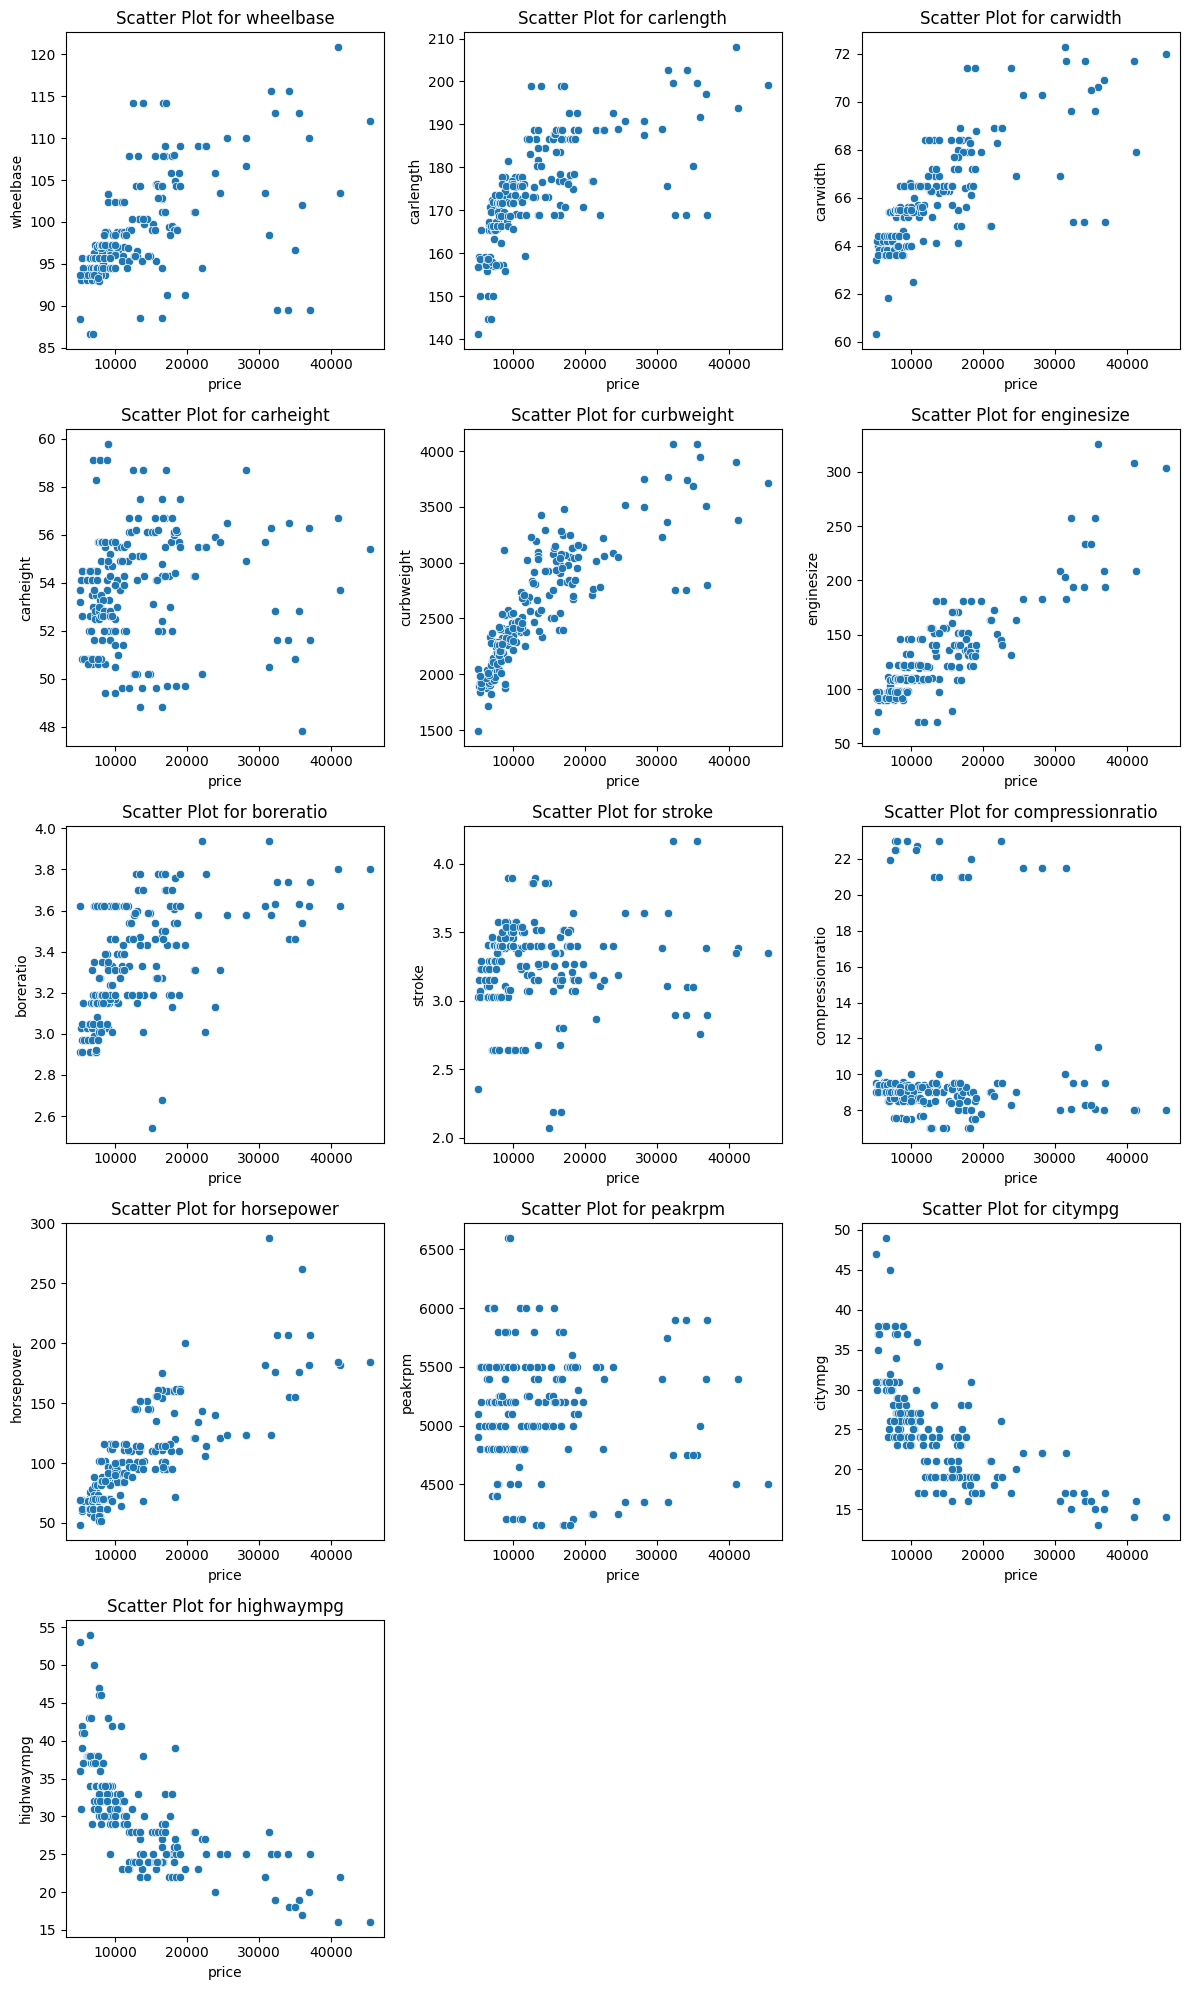

In [18]:
# Creating Visual for different values of numerical data
# Get the numerical feature column names (excluding 'price')
features = df_num.columns[:-1]

# Calculate the number of subplots based on the number of features
num_subplots = len(features)

# Create subplots
fig, axes = plt.subplots(5, 3, figsize=(12, 4 * 5))
axes = axes.flatten()

# Create scatter plots
for i in range(num_subplots):
    sns.scatterplot(data=df_num, x="price", y=features[i], ax=axes[i])
    axes[i].set_xlabel('price')
    axes[i].set_ylabel(features[i])
    axes[i].set_title(f'Scatter Plot for {features[i]}')

# Remove any empty subplots
for i in range(num_subplots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

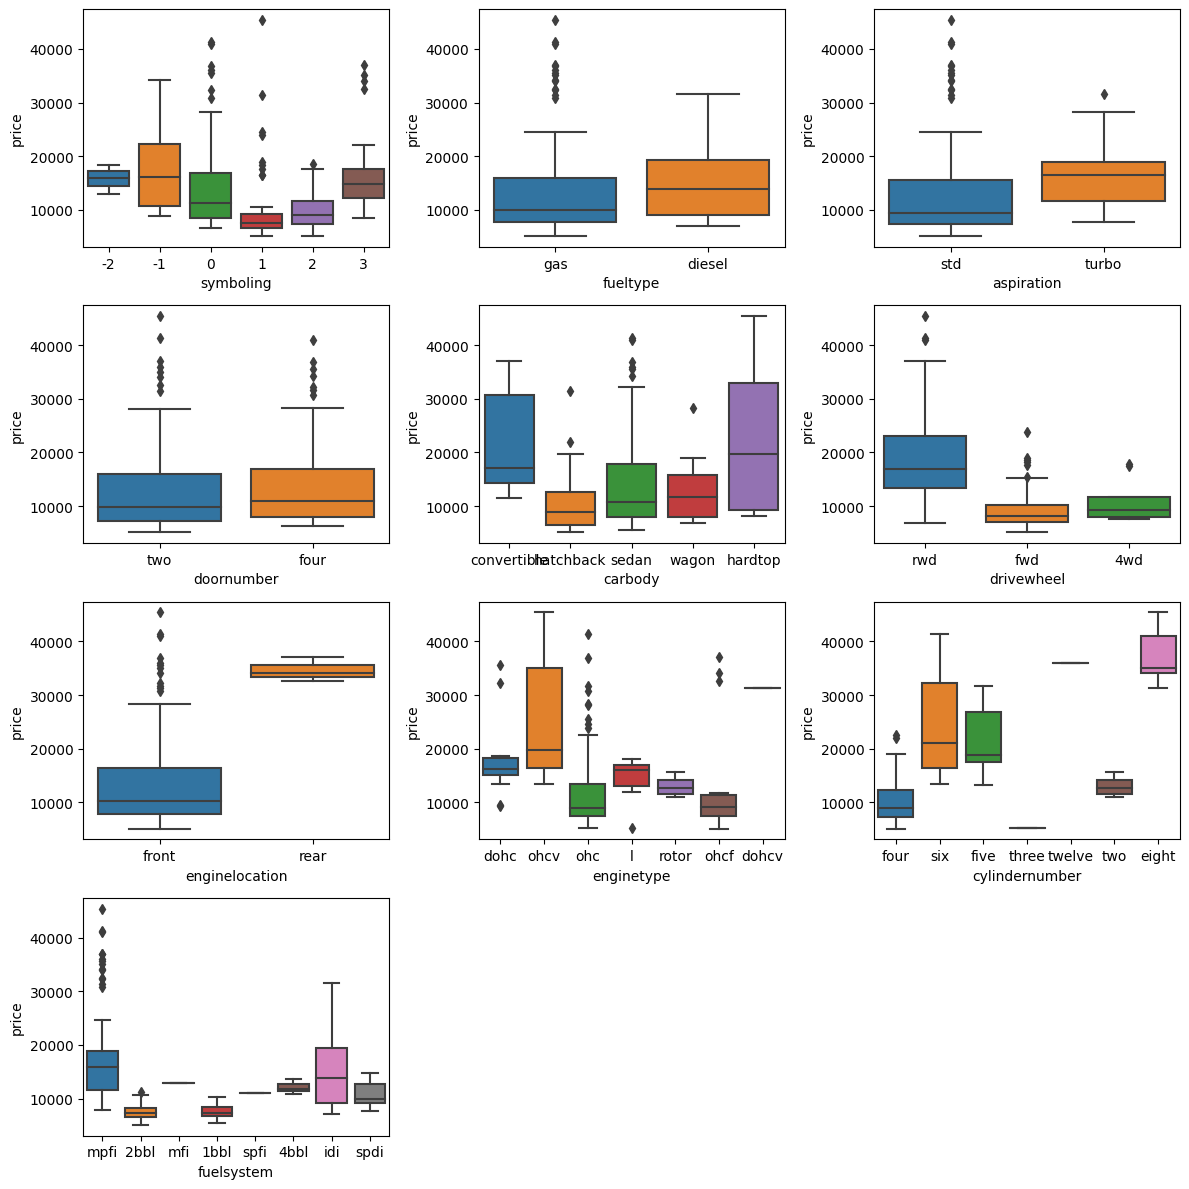

In [19]:
# Visualizing the categorical features
fig, axes = plt.subplots(4,3 , figsize=(12, 3 * 4))
axes = axes.flatten()
features = list(df_cat.columns)
features.remove("Model")
features.remove("Brand")
for i in range(len(features)):
    sns.boxplot(x = features[i], y = 'price', data = df,ax=axes[i])
    
# Remove any empty subplots
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

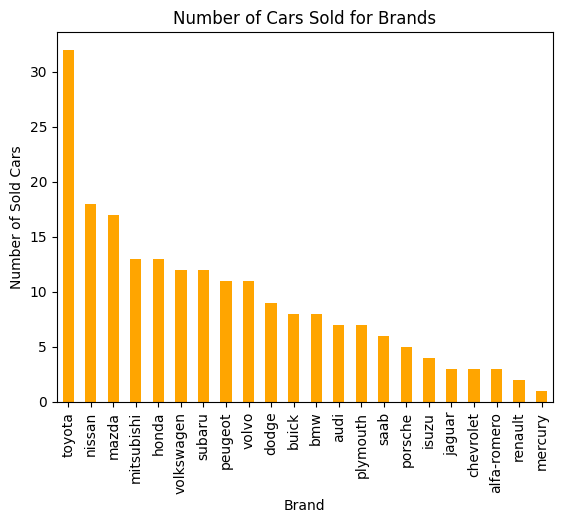

In [20]:
# Visualizing Brand with price
df.groupby("Brand")["Brand"].count().sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title("Number of Cars Sold for Brands")
plt.xlabel("Brand")
plt.ylabel("Number of Sold Cars")
plt.show()

##### Toyota is the most sold brand whereas Mercury is the least sold brand.

### Label Encoding the Categorical features

In [21]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to selected columns
for column in df_cat:
    df[column] = label_encoder.fit_transform(df[column])          

In [22]:
# List of column names to keep
columns_to_keep = [
    'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
    'enginetype', 'cylindernumber', 'Brand', 
    'carwidth', 'curbweight', 'enginesize', 'horsepower', 'price'
]

# Create a DataFrame with only the desired columns
df_final = df[columns_to_keep]

# Print the columns of df_final
df_final.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,cylindernumber,Brand,carwidth,curbweight,enginesize,horsepower,price
0,1,0,0,2,0,0,2,0,64.1,2548,130,111,13495.0
1,1,0,0,2,0,0,2,0,64.1,2548,130,111,16500.0
2,1,0,2,2,0,5,3,0,65.5,2823,152,154,16500.0
3,1,0,3,1,0,3,2,1,66.2,2337,109,102,13950.0
4,1,0,3,0,0,3,1,1,66.4,2824,136,115,17450.0


### The steps for predication begins
#### Selecting the features and traget variables

In [23]:
# Select the features and target variables
X  = df.loc[:, df.columns != 'price']
y = df[['price']]

In [24]:
# Splitting the variables into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

#### Using Random Forest

In [25]:
# Create a RandomForestRegressor instance with hyperparameters
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Fit the model to your training data
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [26]:
# Make price predictions using the trained Random Forest model
price_predictions = rf_regressor.predict(X_test)

In [27]:
# Calculate metrics
mae = mean_absolute_error(y_test, price_predictions)
mse = mean_squared_error(y_test, price_predictions)
rmse = mean_squared_error(y_test, price_predictions, squared=False)
r2 = r2_score(y_test, price_predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error: 1435.4104334219903
Mean Squared Error: 4221265.426658697
Root Mean Squared Error: 2054.5718353610073
R-squared (R2): 0.9115375555948567


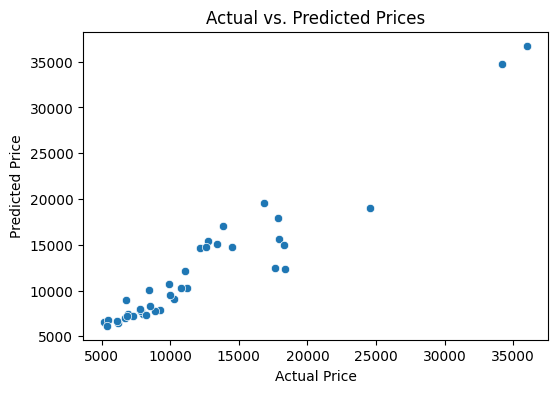

In [28]:
# Flatten the actual and predicted prices arrays
actual_prices_flat = y_test.to_numpy().flatten()
predicted_prices_flat = price_predictions.flatten()

# Create a DataFrame to hold flattened actual and predicted prices
compare_prices = pd.DataFrame({'Actual Price': actual_prices_flat, 'Predicted Price': predicted_prices_flat})

# Plot actual vs. predicted prices
plt.figure(figsize=(6, 4))
sns.scatterplot(data=compare_prices, x='Actual Price', y='Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

#### Using KNN

In [29]:
# Create a KNeighborsRegressor instance with k=5
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the model to your training data
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [30]:
# Make price predictions using the trained KNN regression model
price_predictions = knn_regressor.predict(X_test)

In [31]:
# Calculate metrics
mae = mean_absolute_error(y_test, price_predictions)
mse = mean_squared_error(y_test, price_predictions)
rmse = mean_squared_error(y_test, price_predictions, squared=False)
r2 = r2_score(y_test, price_predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error: 1799.0690975609753
Mean Squared Error: 6390525.837997291
Root Mean Squared Error: 2527.948938961642
R-squared (R2): 0.8660777090459004


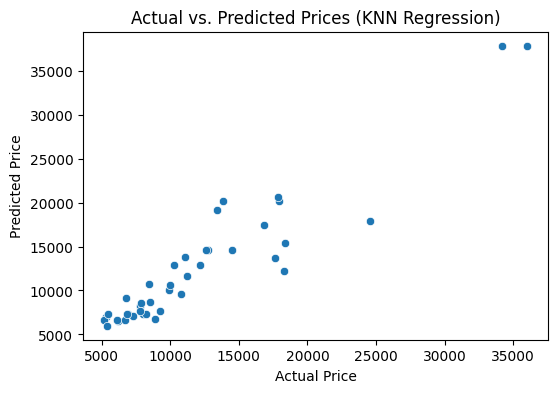

In [32]:
# Reshape the data to one-dimensional arrays or Series
y_test = y_test.values.flatten()
price_predictions = price_predictions.flatten()

# Plot actual vs. predicted prices
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=price_predictions)
plt.title('Actual vs. Predicted Prices (KNN Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

#### Using Linear Regression

Mean Squared Error (MSE): 6642175.2106373655
Root Mean Squared Error (RMSE): 2577.2417835037063
R-squared (R2): 0.8608040490442874


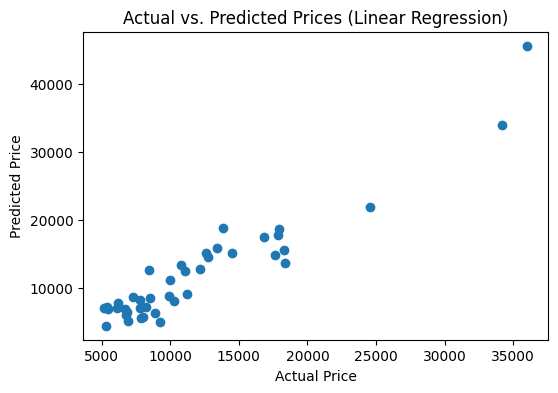

In [33]:
# Create and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make price predictions on the test set
price_predictions = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, price_predictions)
rmse = mean_squared_error(y_test, price_predictions, squared=False)
r2 = r2_score(y_test, price_predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Visualize actual vs. predicted prices
plt.figure(figsize=(6, 4))
plt.scatter(y_test, price_predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices (Linear Regression)")
plt.show()

##### The r2 value for Random Forest is 91.15%, for KNN is 86.60% and for Linear Regression is 80.08%.